In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ABALONE_DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv"

df = pd.read_csv(ABALONE_DATASET)

1. Размеры таблицы, число столбцов и количество пропусков в столбцах.

In [3]:
print(f"Кол-во строк: {df.shape[0]}", f"Кол-во столбцов: {df.shape[1]}", sep="\n")
print("Кол-во пропусков: ", df.isnull().sum().sum())


Кол-во строк: 4177
Кол-во столбцов: 9
Кол-во пропусков:  248


2. По каждому столбцу посмотреть его распределение. Если есть пропуски и ошибочные значения - обработать их. Посмотреть связь с целевой переменной.

In [4]:
print(df.isnull().mean() * 100) # посмотрим, где больше всего пропусков (в среднем)

# заменим все пропуски медианными значениями

median_diameter = df['Diameter'].median()
df.fillna({ "Diameter": median_diameter }, inplace=True)

median_whole_weight = df['Whole weight'].median()
df.fillna({ "Whole weight": median_whole_weight }, inplace=True)

median_shell_weight = df['Shell weight'].median()
df.fillna({ "Shell weight": median_shell_weight }, inplace=True)

Sex               0.000000
Length            0.000000
Diameter          2.370122
Height            0.000000
Whole weight      2.370122
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      1.197031
Rings             0.000000
dtype: float64


(array([  17.,  431., 1648., 1388.,  329.,  228.,  100.,   29.,    4.,
           3.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

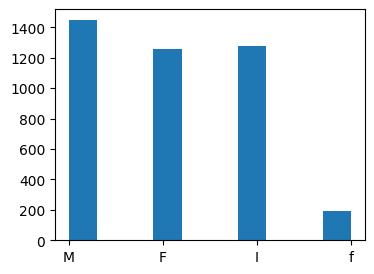

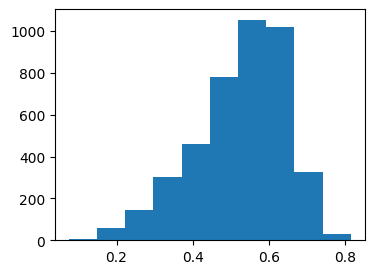

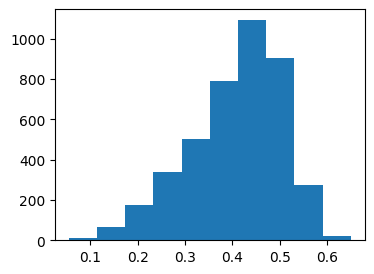

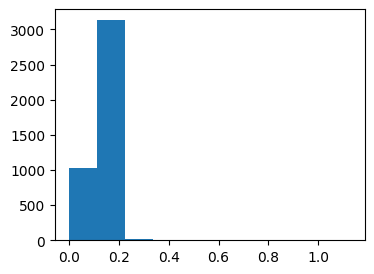

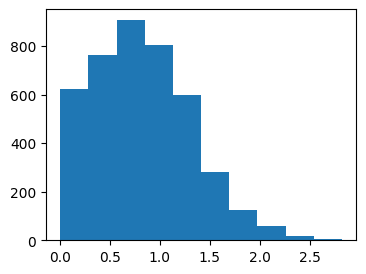

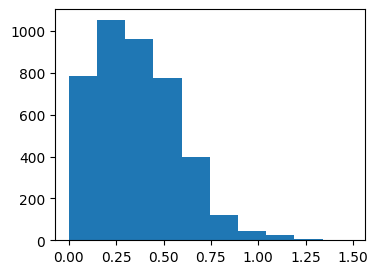

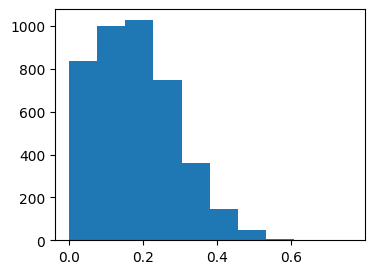

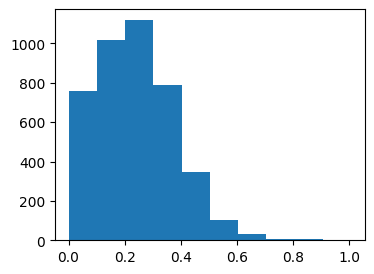

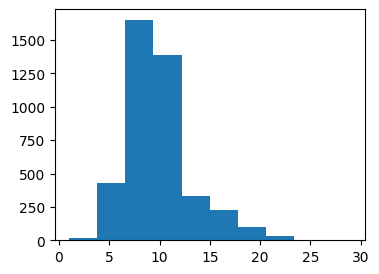

In [5]:
# Распределение каждого столбца

plt.figure(figsize=(4,3))
plt.hist(df["Sex"])

plt.figure(figsize=(4,3))
plt.hist(df["Length"])

plt.figure(figsize=(4,3))
plt.hist(df["Diameter"])

plt.figure(figsize=(4,3))
plt.hist(df["Height"])

plt.figure(figsize=(4,3))
plt.hist(df["Whole weight"])

plt.figure(figsize=(4,3))
plt.hist(df["Shucked weight"])

plt.figure(figsize=(4,3))
plt.hist(df["Viscera weight"])

plt.figure(figsize=(4,3))
plt.hist(df["Shell weight"])

plt.figure(figsize=(4,3))
plt.hist(df["Rings"])

3. Построить матрицу корреляций (или ее аналог для категориальных признаков)

/home/eugene/.local/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/home/eugene/.local/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/home/eugene/.local/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

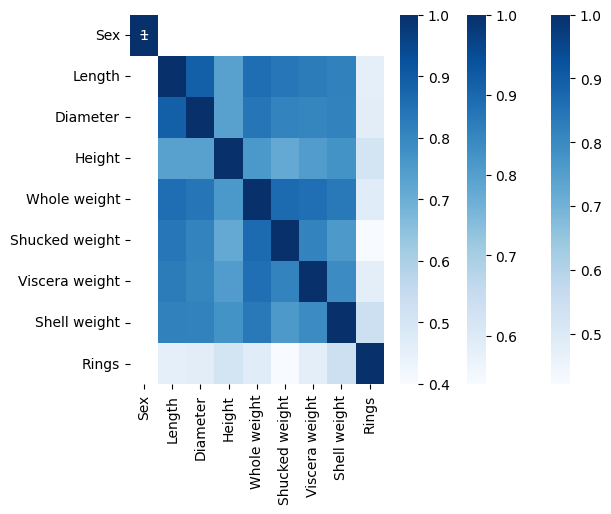

In [16]:
# от ошибки pandas на тип
df['Sex'] = df['Sex'].apply(lambda x: x == "M" if 1 else x == "F" if 2 else x == "I" if 0 else -1)

corr = df.corr() # Корреляция Пирсона
sns.heatmap(corr, cmap="Blues", annot=True)

corr = df.corr(method='spearman') # Корреляция Спирмена
sns.heatmap(corr, cmap="Blues", annot=True)

corr = df.corr(method='kendall') # Корреляция Кендала
sns.heatmap(corr, cmap="Blues", annot=True)

4. Провести анализ целевой переменной - на какое распределение больше всего похожа ее гистограмма? Какие проблемы в связи с этим могут возникнуть при обучении моделей?

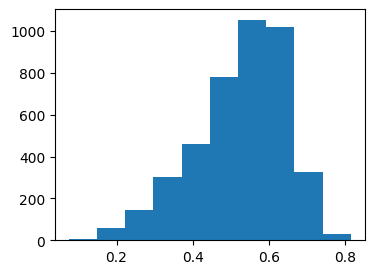

In [19]:
plt.figure(figsize=(4,3))

plt.hist(df['Length'])

При обучении такое распределении может привести к тому, что модель не будет обучена на низкий и высоких значениях поля Length. Только лишь на средних (0.5 - 0.7)

5. Увеличить размер данных простым дублированием до 1_000_000 строк в датасете. Провести сравнение скорости работы Pandas и Polars на увеличенном датасете по параметрам:

In [ ]:
# Увеличу размер датасета

df_big = df.copy()

for i in range(250):
  df_big = pd.concat([df_big, df])

df_big.to_csv("abalone_big.csv", index=False)

print(df_big.shape)

(1048427, 9)


In [ ]:
!pip install polars

import polars as pl

print(pl.__version__)

Defaulting to user installation because normal site-packages is not writeable
0.20.10


In [ ]:
%%time

df = pd.read_csv("./abalone_big.csv")

CPU times: user 369 ms, sys: 72.5 ms, total: 441 ms
Wall time: 441 ms


In [ ]:
%%time

df_pl = pl.read_csv("abalone_big.csv")

CPU times: user 466 ms, sys: 55.2 ms, total: 521 ms
Wall time: 75.9 ms


Polars куда быстрее Pandas при загрузке файла!

In [ ]:
%%time

df[['Length', 'Diameter']]

CPU times: user 3.57 ms, sys: 3.78 ms, total: 7.35 ms
Wall time: 5.64 ms


,Length,Diameter
0,0.455,0.365
1,0.350,0.265
2,0.530,0.420
3,0.440,0.365
4,0.330,0.255
...,...,...
1048422,0.565,0.450
1048423,0.590,0.440
1048424,0.600,0.475
1048425,0.625,0.485


In [ ]:
%%time

df[['Length', 'Diameter']]

CPU times: user 4.55 ms, sys: 2.24 ms, total: 6.8 ms
Wall time: 5.26 ms


,Length,Diameter
0,0.455,0.365
1,0.350,0.265
2,0.530,0.420
3,0.440,0.365
4,0.330,0.255
...,...,...
1048422,0.565,0.450
1048423,0.590,0.440
1048424,0.600,0.475
1048425,0.625,0.485


При фильтрации время примерно одинаковое.

In [ ]:
%%time

df.groupby('Sex').agg({'Diameter' : 'mean', 'Length' : 'max'})

CPU times: user 40.6 ms, sys: 4.27 ms, total: 44.8 ms
Wall time: 44.4 ms


,Diameter,Length
Sex,,
F,0.453511,0.815
I,0.328382,0.725
M,0.438072,0.780
f,0.417282,0.760


In [ ]:
%%time

df_pl.groupby('Sex').agg([pl.mean('Diameter'), pl.max('Length')])

CPU times: user 42.6 ms, sys: 23.3 ms, total: 65.9 ms
Wall time: 36.4 ms


<timed eval>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.


Sex,Diameter,Length
str,f64,f64
"""I""",0.328382,0.725
"""f""",0.417282,0.76
"""F""",0.453511,0.815
"""M""",0.438072,0.78


Polars совершает агрегацию быстрее в 1.5-2 раза